**Jupyter Notebook Example: Decision Tree for Predicting Product Purchase**

**1. Introduction to Decision Trees**

* **Concept:** Decision Trees are a type of supervised learning algorithm used for both classification and regression tasks. They work by creating a tree-like structure where each internal node represents a "decision" or a test on an attribute (feature), each branch represents the outcome of that test, and each leaf node represents the final decision or prediction.

* **Analogy:** Imagine you're trying to decide whether to buy a particular product online. You might go through a series of questions:
    * Is the price less than $50? (Yes/No)
    * If Yes, are the customer reviews generally positive? (Yes/No)
    * If Yes, is it in stock? (Yes/No)
    * Based on the answers to these questions, you might finally decide to "Buy" or "Not Buy."

    A decision tree works in a similar way, automatically learning these decision rules from the data.

* **Classification vs. Regression:**
    * **Classification Trees:** Used when the target variable is categorical (e.g., Buy/Not Buy, Yes/No, Type A/Type B). The leaf nodes in a classification tree represent the class labels.
    * **Regression Trees:** Used when the target variable is continuous (e.g., predicting house price, temperature). The leaf nodes in a regression tree represent the predicted continuous value.

* **Key Idea:** Decision trees aim to find the most informative features to split the data at each node, with the goal of creating subsets of data that are as "pure" as possible with respect to the target variable. For classification, "pure" means that most of the data points in a subset belong to the same class.

**2. Use Case: Predicting Product Purchase Based on Customer Features**

* **Scenario:** Let's say you're an e-commerce company, and you want to predict whether a customer will purchase a specific product based on their Browse history and demographics. You have collected data on:
    * **Age:** Customer's age group (e.g., Young, Middle-Aged, Senior).
    * **Browse History:** Whether they viewed the product page recently (Yes/No).
    * **Previous Purchases:** Whether they have purchased from your website before (Yes/No).
    * **Purchase:** The target variable – whether they ultimately purchased the product (Yes/No).

* **Dataset (Example - Synthetic):**

    | Age          | Browse History | Previous Purchases | Purchase (Target) |
    |--------------|------------------|--------------------|-------------------|
    | Young        | Yes              | Yes                | Yes               |
    | Middle-Aged  | No               | No                 | No                |
    | Senior       | Yes              | No                 | No                |
    | Young        | Yes              | No                 | Yes               |
    | Middle-Aged  | Yes              | Yes                | Yes               |
    | Senior       | No               | Yes                | No                |
    | ...          | ...              | ...                | ...               |

**3. Python Code in Jupyter Notebook**

Let's write the Python code to build and visualize a decision tree for this use case.

**Step 1: Import Libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder # For encoding categorical features
import seaborn as sns

**Step 2: Create Synthetic Data**

In [14]:
# Create synthetic data
data = pd.DataFrame({
    'Age': ['Young', 'Middle-Aged', 'Senior', 'Young', 'Middle-Aged', 'Senior', 'Young', 'Middle-Aged', 'Senior', 'Young', 'Middle-Aged', 'Senior'],
    'Browse History': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Previous Purchases': ['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No'],
    'Purchase': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes']
})

print(data)

            Age Browse History Previous Purchases Purchase
0         Young            Yes                Yes      Yes
1   Middle-Aged             No                 No       No
2        Senior            Yes                 No       No
3         Young            Yes                 No      Yes
4   Middle-Aged            Yes                Yes      Yes
5        Senior             No                Yes       No
6         Young             No                 No       No
7   Middle-Aged            Yes                 No       No
8        Senior             No                Yes       No
9         Young            Yes                Yes      Yes
10  Middle-Aged             No                Yes      Yes
11       Senior            Yes                 No      Yes


**Step 3: Preprocess Categorical Features**

Decision tree algorithms in scikit-learn (and many others) work best with numerical data. We need to encode our categorical features ('Age', 'Browse History', 'Previous Purchases', 'Purchase'). We'll use `LabelEncoder` for simplicity.

In [15]:
# Initialize separate LabelEncoders for each feature
age_encoder = LabelEncoder()
browse_encoder = LabelEncoder()
previous_encoder = LabelEncoder()
purchase_encoder = LabelEncoder()

# Encode categorical features
data['Age_Encoded'] = age_encoder.fit_transform(data['Age'])
data['Browse_Encoded'] = browse_encoder.fit_transform(data['Browse History'])
data['Previous_Encoded'] = previous_encoder.fit_transform(data['Previous Purchases'])
data['Purchase_Encoded'] = purchase_encoder.fit_transform(data['Purchase'])

# Drop original categorical columns
data_processed = data.drop(['Age', 'Browse History', 'Previous Purchases', 'Purchase'], axis=1)

print("\nProcessed Data:")
print(data_processed)


Processed Data:
    Age_Encoded  Browse_Encoded  Previous_Encoded  Purchase_Encoded
0             2               1                 1                 1
1             0               0                 0                 0
2             1               1                 0                 0
3             2               1                 0                 1
4             0               1                 1                 1
5             1               0                 1                 0
6             2               0                 0                 0
7             0               1                 0                 0
8             1               0                 1                 0
9             2               1                 1                 1
10            0               0                 1                 1
11            1               1                 0                 1


**Explanation:**

* We create new columns (e.g., 'Age\_Encoded') where the categorical values are replaced with numerical labels (e.g., Young: 2, Middle-Aged: 0, Senior: 1 – the specific mapping depends on the order of categories).
* We drop the original categorical columns to work with the encoded data for training.

**Step 4: Prepare Data (Features and Target)**

In [16]:
X = data_processed[['Age_Encoded', 'Browse_Encoded', 'Previous_Encoded']] # Features
y = data_processed['Purchase_Encoded'] # Target

**Step 5: Split into Training and Testing Sets**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("\nClass distribution in training set:\n", pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution in testing set:\n", pd.Series(y_test).value_counts(normalize=True))

Training set size: 8
Testing set size: 4

Class distribution in training set:
 Purchase_Encoded
0    0.5
1    0.5
Name: proportion, dtype: float64

Class distribution in testing set:
 Purchase_Encoded
1    0.5
0    0.5
Name: proportion, dtype: float64


**Step 6: Train the Decision Tree Classifier**

We'll use `DecisionTreeClassifier` for our classification task.

In [18]:
# Create a Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42) # Setting random_state for reproducibility

# Train the model
model.fit(X_train, y_train)

print("\nDecision Tree Classifier Trained!")


Decision Tree Classifier Trained!


**Step 7: Make Predictions**

In [19]:
y_pred = model.predict(X_test)

**Step 8: Evaluate the Model**

Accuracy on Test Set: 0.50

Confusion Matrix:
 [[2 0]
 [2 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



g:\abhi_ml_practise\ml-playbook\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\abhi_ml_practise\ml-playbook\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\abhi_ml_practise\ml-playbook\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


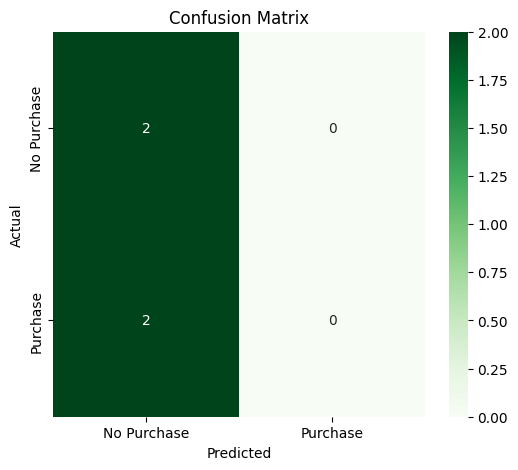

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Step 9: Visualize the Decision Tree**

This is a key advantage of decision trees – they are relatively easy to visualize and interpret.

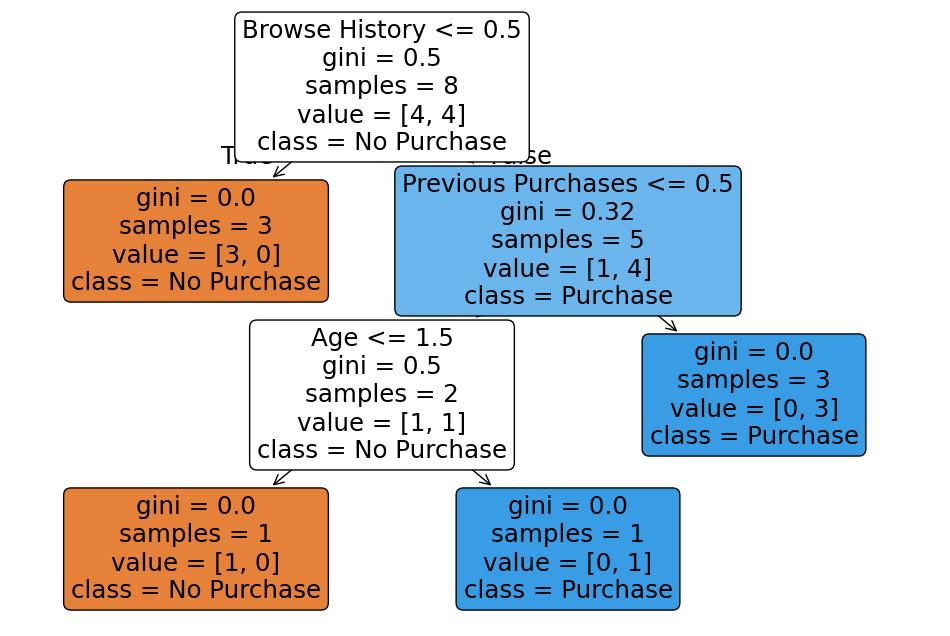

In [21]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Age', 'Browse History', 'Previous Purchases'],
          class_names=['No Purchase', 'Purchase'], filled=True, rounded=True)
plt.show()

**Explanation:**

* `plot_tree(...)`: This function from `sklearn.tree` helps visualize the trained decision tree.
    * `model`: The trained `DecisionTreeClassifier` object.
    * `feature_names`: The original names of our features (before encoding) for better readability in the tree.
    * `class_names`: The names of our target classes.
    * `filled=True`: Colors the nodes based on the majority class.
    * `rounded=True`: Makes the node corners rounded.

*Looking at the visualized tree, you can follow the decision paths based on the features to see how the model arrives at a prediction.*

**Step 10: Make Predictions for New Data**

Let's predict the purchase probability for a new customer. Remember to encode the new data in the same way we encoded the training data.

In [22]:
# **Step 10: Make Predictions for New Data**
new_customer = pd.DataFrame({
    'Age': ['Young'],
    'Browse History': ['Yes'],
    'Previous Purchases': ['No']
})
# Encode the new data using stored encoders
new_customer['Age_Encoded'] = age_encoder.transform(new_customer['Age'])
new_customer['Browse_Encoded'] = browse_encoder.transform(new_customer['Browse History'])
new_customer['Previous_Encoded'] = previous_encoder.transform(new_customer['Previous Purchases'])

new_customer_processed = new_customer[['Age_Encoded', 'Browse_Encoded', 'Previous_Encoded']]

# Predict
predicted_purchase_encoded = model.predict(new_customer_processed)

# Decode the prediction back to original label
predicted_purchase = purchase_encoder.inverse_transform(predicted_purchase_encoded)

print(f"\nPredicted Purchase for the new customer: {predicted_purchase[0]}")


Predicted Purchase for the new customer: Yes


**Important Note:** When encoding new data, make sure to use the **same** `LabelEncoder` object that you fitted on the training data. Use `transform()` instead of `fit_transform()` to avoid creating new mappings.

**5. Conclusion**

This example illustrated how to build and interpret a Decision Tree for a classification problem. You learned about:

1.  **The Concept of Decision Trees:** How they make decisions based on a series of rules.
2.  **Use Case:** Predicting product purchase.
3.  **Handling Categorical Data:** The need for encoding categorical features into numerical representations.
4.  **Training and Evaluating a Decision Tree Classifier:** Using `DecisionTreeClassifier` and relevant metrics.
5.  **Visualizing the Decision Tree:** A key advantage for understanding the model's logic.
6.  **Making Predictions on New Data:** Ensuring proper preprocessing of new data.

Decision trees are intuitive and powerful algorithms, often used as building blocks for more complex models like Random Forests and Gradient Boosting. They are particularly useful when interpretability is important. However, they can be prone to overfitting, especially with deep trees, which is a topic for further exploration.